<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
df_num = df.drop(columns = ["clase_tipo", 
                            "traccion_tipo", 
                            "combustible_tipo", 
                            "transmision_tipo", 
                            "tamano_motor_tipo", 
                            "consumo_tipo", 
                            "co2_tipo"])
for colum in df_num.columns:
    df_num.loc[df_num[colum].isnull(),colum] = df_num.describe()[colum][1]
    
scaler = MinMaxScaler()

df_num[df_num.columns] = scaler.fit_transform(df_num[df_num.columns])

df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [4]:
df_cat = df.drop(columns = ["year","desplazamiento", "cilindros", "co2", "consumo_litros_milla"])

df_cat = pd.get_dummies(df_cat)

df_cat.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


Lo que hace basicamente este comando es crear una columna para cada variable categórica de cada columna del dataframe del argumento, a la cual le asigna un valor para cada "casilla" de estas nuevas columnas, el valor 1 es asignado si es que la "casilla" es equivalente a la variable categórica, mientras que le asigna el valor 0 en caso contrario, cambiando así las  variables categóricas a variables númericas de valores 0 y 1 dependiendo del caso.

In [5]:
df_procesado = pd.concat([df_num, df_cat], axis=1, join='inner')
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [6]:
kmeans = KMeans(n_clusters=8)

kmeans.fit(df_procesado)

KMeans()

In [7]:
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [8]:
# etiquetar los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')

In [9]:
df_cluster = df_procesado.groupby(['cluster'])
df_mode = df_cluster.agg({"desplazamiento":[np.mean,stats.mode], 
                          "cilindros":[np.mean,stats.mode], 
                          "co2":[np.mean,stats.mode],
                          "consumo_litros_milla":[np.mean,stats.mode]
                         }).reset_index()
df_mode.head()

cluster desplazamiento                                  cilindros  \
                    mean                             mode      mean   
0       0       0.333830   ([0.30769230769230765], [799])  0.258039   
1       1       0.159576   ([0.17948717948717946], [835])  0.141184   
2       2       0.562730    ([0.6538461538461539], [342])  0.405562   
3       3       0.250739  ([0.17948717948717946], [1213])  0.195515   
4       4       0.450894    ([0.4743589743589743], [674])  0.327222   

                                         co2                                   \
                              mode      mean                             mode   
0   ([0.2857142857142857], [3789])  0.354204  ([0.37460335738778855], [1988])   
1  ([0.14285714285714285], [3432])  0.242287    ([0.2751084369722095], [699])   
2  ([0.42857142857142855], [2041])  0.501887    ([0.4541992937202518], [898])   
3  ([0.14285714285714285], [4597])  0.304391  ([0.31774911715031473], [2672])   
4   ([0.2857142857142857], [2684])  0.409967   ([0.4243508175955781], [2053])   

  consumo_litros_milla                                   
                  mean                             mode  
0             0.281247  ([0.30501089324618735], [2105])  
1             0.156504    ([0.1944444444444444], [766])  
2             0.442585  ([0.39346405228758163], [1005])  
3             0.226572  ([0.24183006535947707], [2987])  
4             0.343260   ([0.3310265282583622], [2285])

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [10]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Numero de clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Numero de clusters,Score
0,5,132946.657206
1,10,83595.092316
2,20,67030.640084
3,30,57389.193858
4,50,45236.443821


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Numero de clusters', ylabel='Score'>

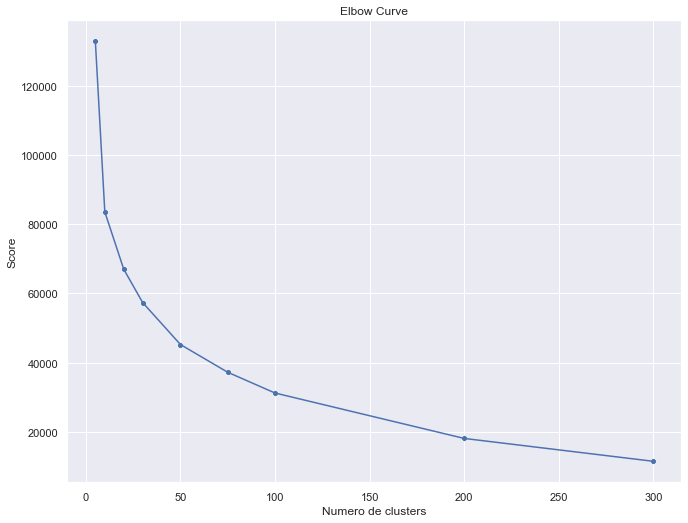

In [11]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Numero de clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Numero de clusters",
             y="Score",
             data=df_Elbow)

Visualmente podemos ver que un cambio brusco se produce en el N = 100 y N = 200 aproximadamente, por lo tanto segun la regla del codo entre 100 y 200 clusters es el número óptimo para elegir, de todas maneras sigue siendo una apreciacion visual y por eso no es tan exacta.